# THE SPARKS FOUNDATION - DATA SCIENCE AND BUSINESS ANALYTICS

# TASK 3 - PREDICTION USING DECISION TREE ALGORITHM                         

# AUTHOR:SOBIYA SELSIYA M

In [1]:
import pandas as pd
import numpy as np

In [2]:
data='Iris (1).csv'
df=pd.read_csv(data) 

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(['Id'],axis=1,inplace=True)

In [6]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(147, 5)

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])


In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wg
wg.filterwarnings("ignore")

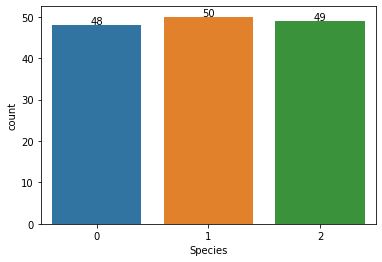

In [18]:
total = len(df)*1
graph=sns.countplot(df['Species'])
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,df['Species'].value_counts()[i],ha="center")
    i += 1

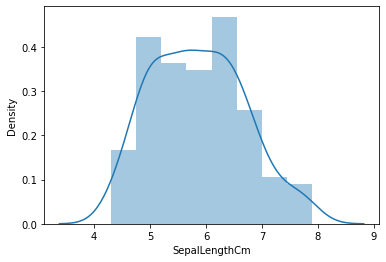

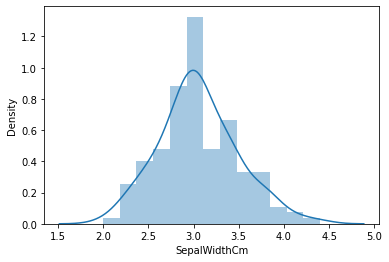

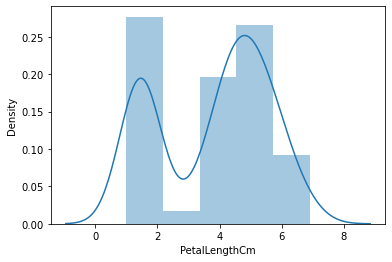

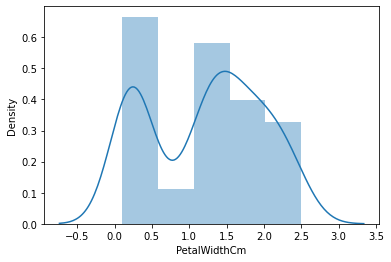

In [19]:
for i in range(4):
    plt.figure()
    sns.distplot(df.iloc[:,i])

<AxesSubplot:>

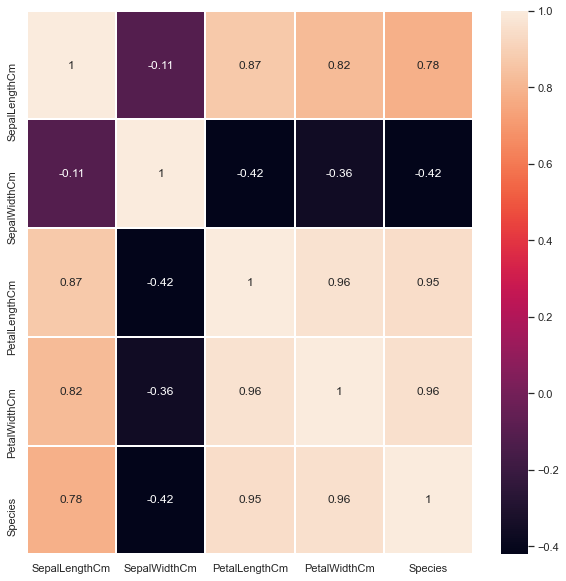

In [20]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(),linewidths=1,annot=True)

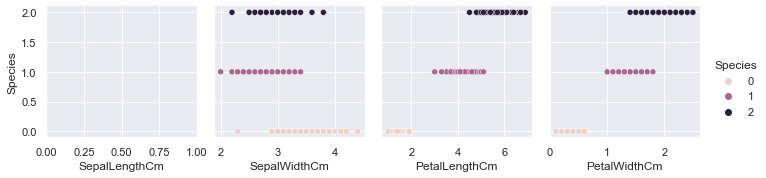

In [21]:
sns.pairplot(data=df,y_vars=['Species'],x_vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],hue='Species')

In [22]:
x_df=df.drop('Species',axis=1)
y_df=df['Species']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
trainX, testX, trainY, testY = train_test_split(x_df,y_df,test_size=0.3,random_state=100)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
fun=DecisionTreeClassifier(random_state=0)

In [27]:
fun.fit(trainX,trainY)

DecisionTreeClassifier(random_state=0)

In [29]:
preds=fun.predict(testX)
preds

array([2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       2])

In [30]:
results = pd.DataFrame({'Actual': testY, 'Predicted': preds})  
results.head()

,Actual,Predicted
114,2,2
15,0,0
112,2,2
120,2,2
11,0,0


In [31]:
from sklearn import metrics  
print('Accuracy:', metrics.accuracy_score(testY, preds))

Accuracy: 0.9555555555555556


In [32]:
from sklearn import tree

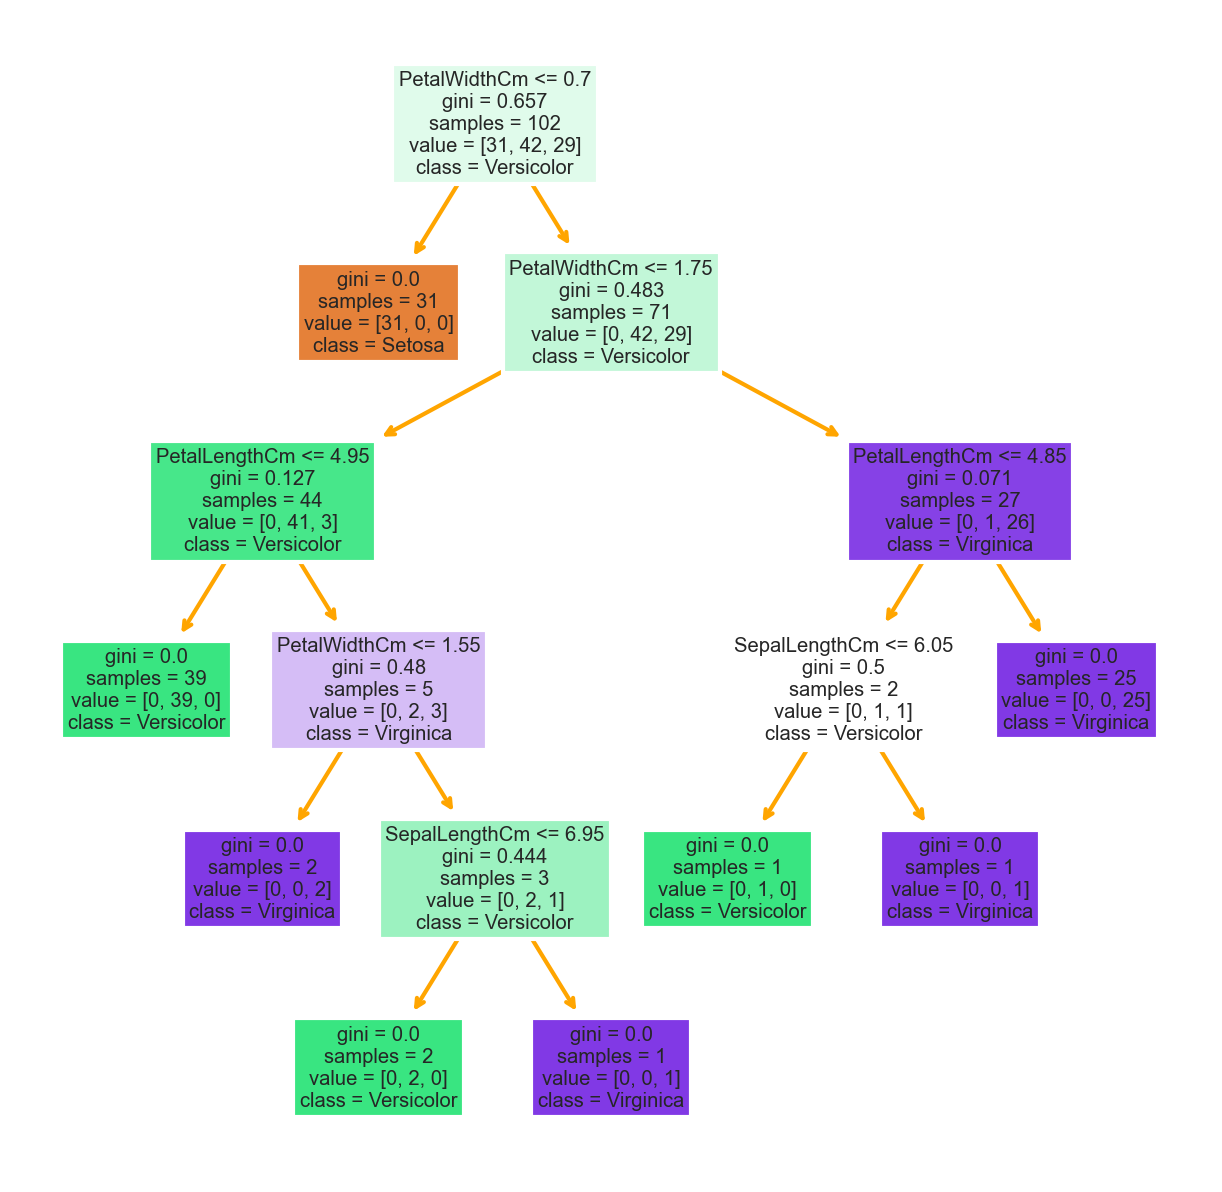

In [34]:
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Setosa','Versicolor','Virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 300)
tPlot=tree.plot_tree(fun, feature_names = fn, class_names = cn, filled = True);

for o in tPlot:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('orange')
        arrow.set_linewidth(1)

Considering only two features of 'PetalLengthCm' and 'PetalWidthCm' since these two features showed high correlation with the target variable 'Species'.

In [35]:
x_df2=df.drop(['Species','SepalLengthCm','SepalWidthCm'],axis=1)
y_df2=df['Species']

In [36]:
x_df2.head(2)

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
trainX2, testX2, trainY2, testY2 = train_test_split(x_df2,y_df2,test_size=0.3,random_state=100)

In [40]:
fun2=DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_leaf=3)

In [41]:
fun2.fit(trainX2,trainY2)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=0)

In [42]:
preds2=fun2.predict(testX2)
preds2

array([2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       2])

In [43]:
results = pd.DataFrame({'Actual': testY2, 'Predicted': preds2})  
results.head()

,Actual,Predicted
114,2,2
15,0,0
112,2,2
120,2,2
11,0,0


In [44]:
print('Accuracy:', metrics.accuracy_score(testY2, preds2))

Accuracy: 0.9777777777777777


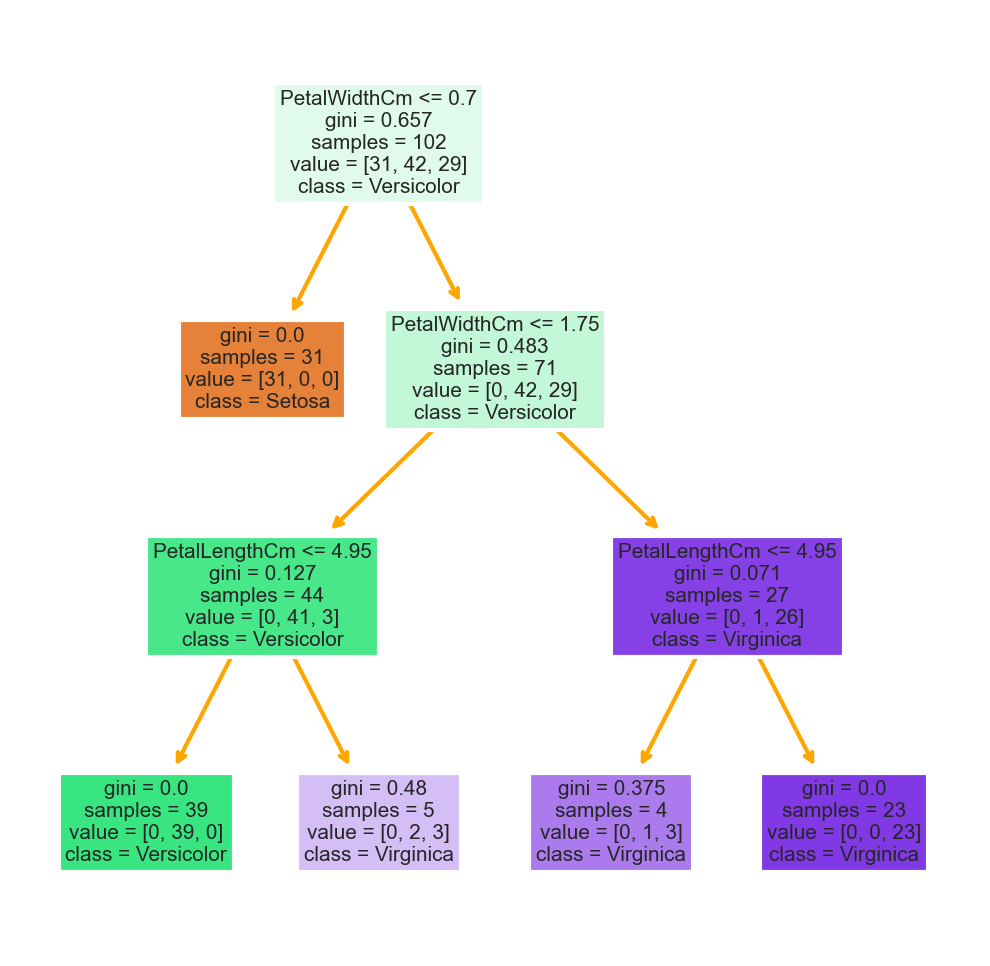

In [45]:
fn=['PetalLengthCm','PetalWidthCm']
cn=['Setosa','Versicolor','Virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tPlot=tree.plot_tree(fun2, feature_names = fn, class_names = cn, filled = True);

for o in tPlot:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('orange')
        arrow.set_linewidth(1)